## Diabetes regression with scikit-learn

This uses the model-agnostic KernelExplainer and the TreeExplainer to explain several different regression models trained on a small diabetes dataset. This notebook is meant to give examples of how to use KernelExplainer for various models.

**load data**

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import shap
import time

X,y = shap.datasets.diabetes()
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# rather than use the whole training set to estimate expected values, we summarize with
# a set of weighted kmeans, each weighted by the number of points they represent.
X_train_summary = shap.kmeans(X_train, 10)

def print_accuracy(f):
    print("Root mean squared test error = {0}".format(np.sqrt(np.mean((f(X_test) - y_test)**2))))
    time.sleep(0.5) # to let the print get out before any progress bars

shap.initjs()

**linear regresion**

In [3]:
from sklearn import linear_model
lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)

print_accuracy(lin_regr.predict)

Root mean squared test error = 58.51766133582009


**Explain a single prediction from the test set**

In [14]:
ex = shap.KernelExplainer(lin_regr.predict, X_train_summary)
shap_values = ex.shap_values(X_test.iloc[0,:])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[0,:])

**Explain all the predictions in the test set**

  0%|          | 0/89 [00:00<?, ?it/s]

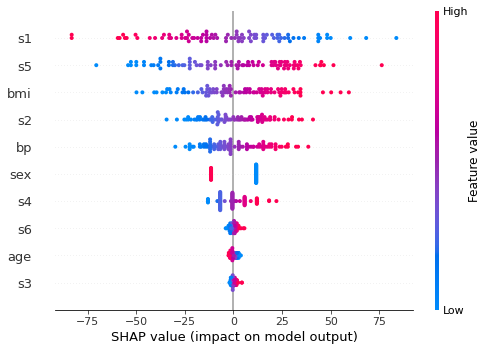

In [15]:
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

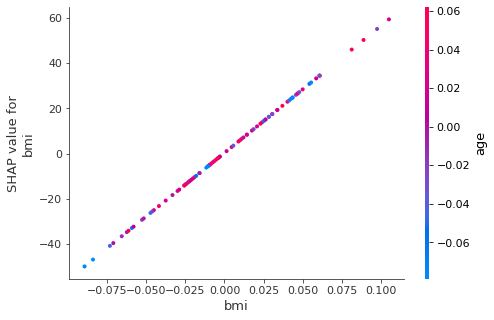

In [16]:
shap.dependence_plot("bmi", shap_values, X_test)

In [17]:
shap.force_plot(ex.expected_value, shap_values, X_test)

## decision tree regressor

In [20]:
from sklearn import tree
dtree = tree.DecisionTreeRegressor(min_samples_split=20)
dtree.fit(X_train, y_train)
print_accuracy(dtree.predict)

Root mean squared test error = 72.73430161947662


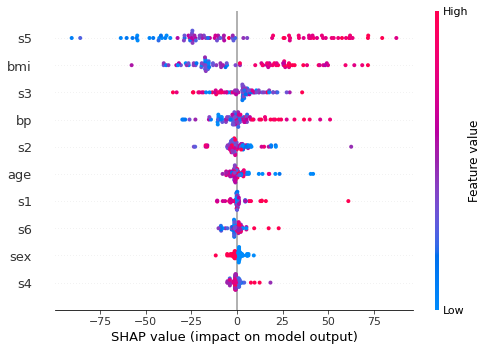

In [21]:
# explain all the predictions in the test set
ex = shap.TreeExplainer(dtree)
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [32]:
#??
shap.plots.beeswarm(shap_values)

UnboundLocalError: local variable 'values' referenced before assignment

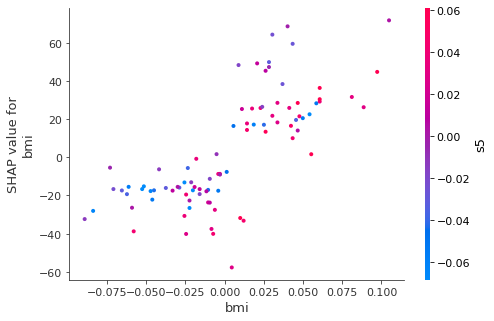

In [37]:
shap.dependence_plot("bmi", shap_values, X_test)

In [38]:
shap.force_plot(ex.expected_value, shap_values, X_test)

## random forest

Using the fast `TreeExplainer` implementation.

Root mean squared test error = 61.27886031573617


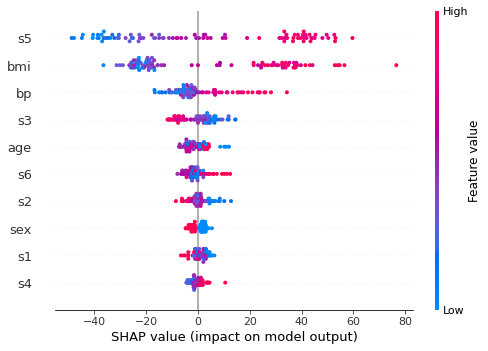

In [40]:
from sklearn.ensemble import RandomForestRegressor
rforest = RandomForestRegressor(n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0)
rforest.fit(X_train, y_train)
print_accuracy(rforest.predict)

# explain all the predictions in the test set
explainer = shap.TreeExplainer(rforest)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

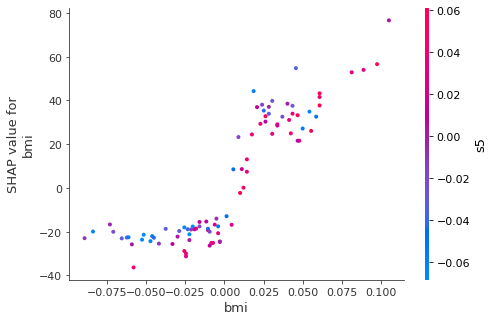

In [41]:
shap.dependence_plot("bmi", shap_values, X_test)

In [42]:
shap.force_plot(explainer.expected_value, shap_values, X_test)

## Neural network

Root mean squared test error = 59.705872056525365


  0%|          | 0/89 [00:00<?, ?it/s]

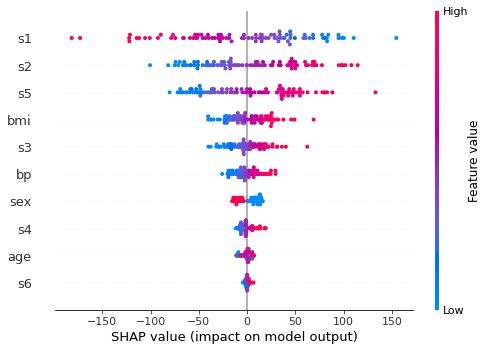

In [60]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=0, max_iter=500)
nn.fit(X_train, y_train)
print_accuracy(nn.predict)

# explain all the predictions in the test set
explainer = shap.KernelExplainer(nn.predict, X_train_summary)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

------

In [56]:
from sklearn.neural_network import MLPRegressor
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

nn = MLPRegressor(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=0)
pipe = make_pipeline(StandardScaler(), nn)

pipe.fit(X_train, y_train)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(alpha=0.1, hidden_layer_sizes=(5, 2),
                              random_state=0, solver='lbfgs'))])

In [54]:
pipe.score(X_test, y_test)

0.28447526368405407

------

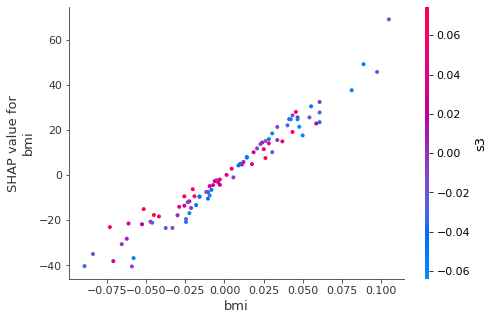

In [61]:
shap.dependence_plot("bmi", shap_values, X_test)

In [62]:
shap.force_plot(explainer.expected_value, shap_values, X_test)